In [45]:
'''
Welcome to our Notebook!

This is for the Urban Air Quality Group

Group Members: Selma, Ethan, Sophiya
'''

'\nWelcome to our Notebook!\n\nThis is for the Urban Air Quality Group\n\nGroup Members: Selma, Ethan, Sophiya\n'

In [46]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

In [47]:
# Read the CSV file
df = pd.read_csv('IHME_GBD_2021_AIR_POLLUTION_1990_2021_PM_Y2022M01D31.csv')

df.head()

,measure_id,measure_name,location_id,location_name,rei_id,rei_name,year_id,mean,median,lower,upper,unit
0,19,Continuous,1,Global,86,Ambient particulate matter pollution,1990,39.535353,38.720921,29.652773,52.575465,micrograms per cubic meter
1,19,Continuous,1,Global,86,Ambient particulate matter pollution,1991,39.228650,38.693484,31.173213,49.421749,micrograms per cubic meter
2,19,Continuous,1,Global,86,Ambient particulate matter pollution,1992,38.978047,38.589155,32.093107,47.101727,micrograms per cubic meter
3,19,Continuous,1,Global,86,Ambient particulate matter pollution,1993,38.789629,38.381171,32.354574,46.929316,micrograms per cubic meter
4,19,Continuous,1,Global,86,Ambient particulate matter pollution,1994,38.667614,38.177500,31.756251,48.136018,micrograms per cubic meter


In [48]:
print(df.columns)

Index(['measure_id', 'measure_name', 'location_id', 'location_name', 'rei_id',
       'rei_name', 'year_id', 'mean', 'median', 'lower', 'upper', 'unit'],
      dtype='object')


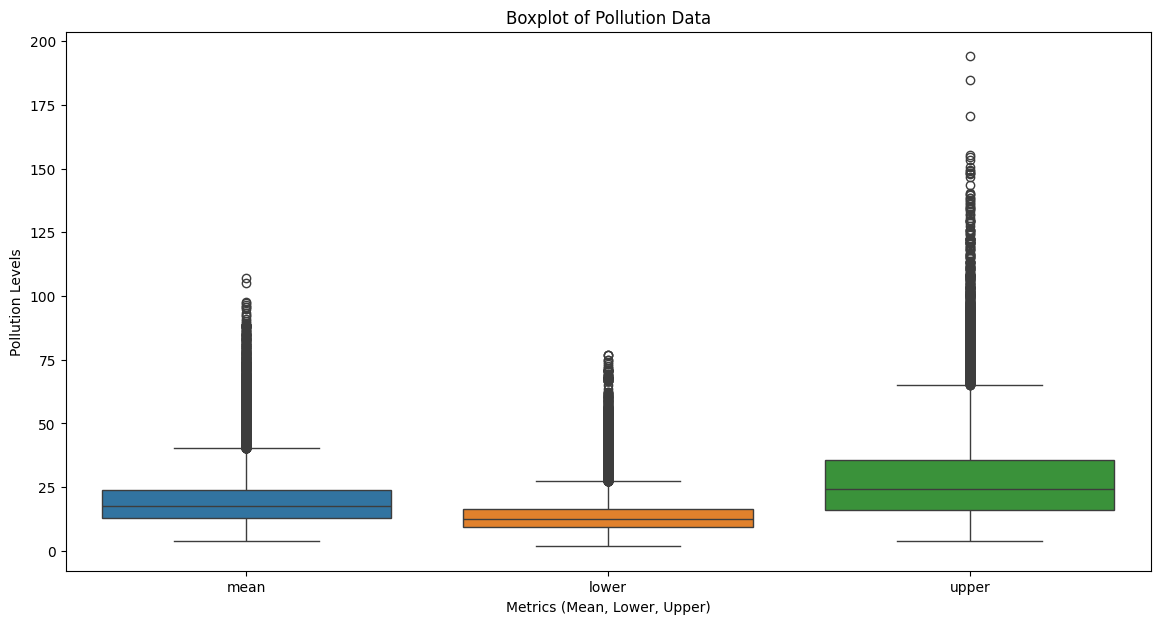

In [49]:
# graph boxplot
# Create a boxplot
plt.figure(figsize=(14, 7))
sns.boxplot(data=df[['mean', 'lower', 'upper']])
plt.title('Boxplot of Pollution Data')
plt.ylabel('Pollution Levels')
plt.xlabel('Metrics (Mean, Lower, Upper)')
plt.show()


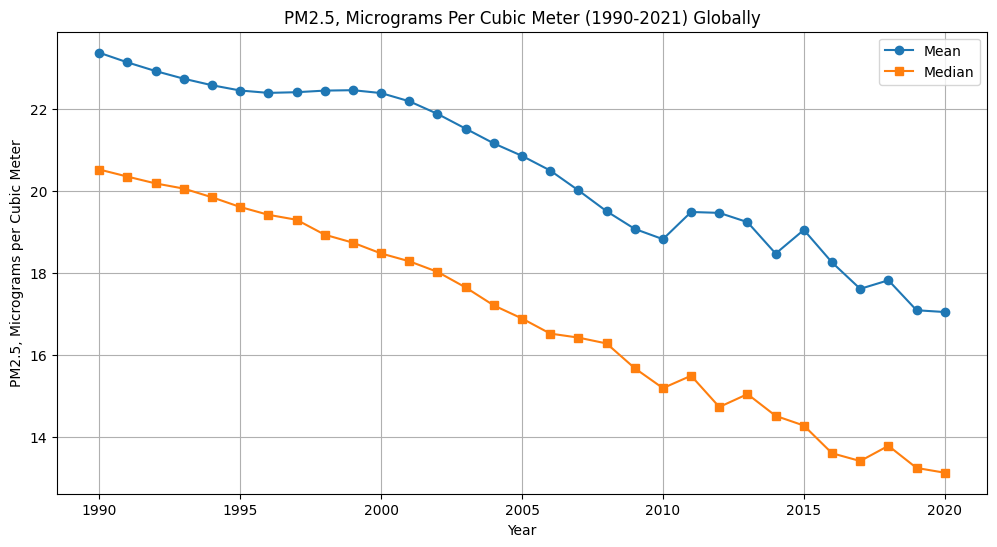

In [51]:
# Filter the data to include only rows between 1990 and 2021
filtered_df = df[(df['year_id'] >= 1990) & (df['year_id'] <= 2021)]

# Group by 'Year' and calculate the mean and median for the 'Value' column
stats = filtered_df.groupby('year_id')['mean'].agg(['mean', 'median']).reset_index()

# Plot the mean and median
plt.figure(figsize=(12, 6))
plt.plot(stats['year_id'], stats['mean'], label='Mean', marker='o')
plt.plot(stats['year_id'], stats['median'], label='Median', marker='s')
plt.title('PM2.5, Micrograms Per Cubic Meter (1990-2021) Globally')
plt.xlabel('Year')
plt.ylabel('PM2.5, Micrograms per Cubic Meter')
plt.legend()
plt.grid(True)
plt.show()

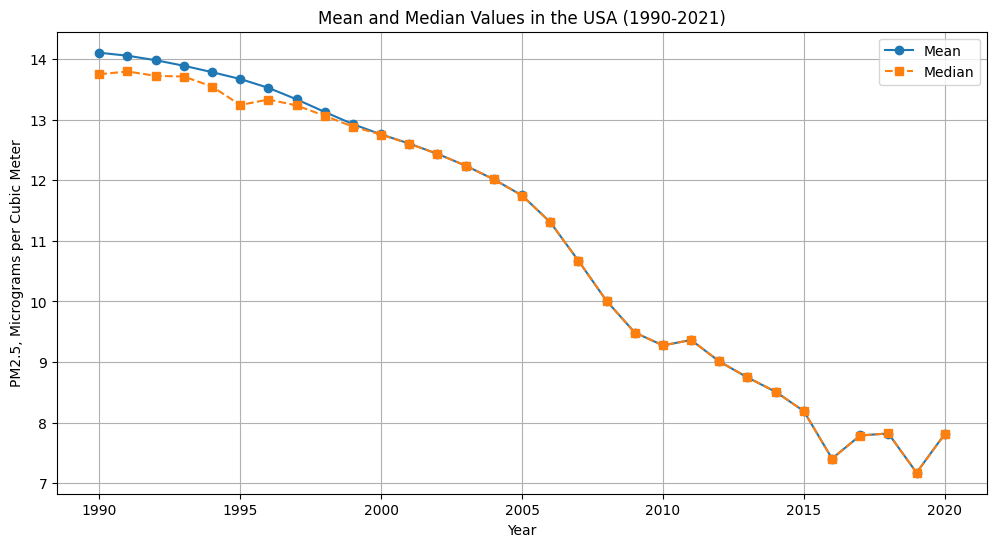

In [55]:


# Filter the data for years 1990–2021 and location_name == 'United States of America'
filtered_df = df[(df['year_id'] >= 1990) & (df['year_id'] <= 2021) & (df['location_name'] == 'United States of America')]

# Group by 'year_id' and calculate mean and median
stats = filtered_df.groupby('year_id')[['mean', 'median']].mean().reset_index()

# Plot the mean and median
plt.figure(figsize=(12, 6))
plt.plot(stats['year_id'], stats['mean'], label='Mean', marker='o', linestyle='-')
plt.plot(stats['year_id'], stats['median'], label='Median', marker='s', linestyle='--')
plt.title('Mean and Median Values in the USA (1990-2021)')
plt.xlabel('Year')
plt.ylabel('PM2.5, Micrograms per Cubic Meter')
plt.legend()
plt.grid(True)
plt.show()